# **📌DATA SCHOOL PROJECT06**  
**┗ 고객 Segmentation을 위한 RFM분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 고객 Segmentation을 위한 RFM분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Segmentaion
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Segmentation 기법인 RFM 개념을 이해하고, 적용할 수 있는 역량 습득
```

## **문제상황 Introduction**
---

> **시나리오**  🌟⛳

```
A사는 오픈마켓 플랫폼을 운영 중이다. 런칭 이후 사용자들이 빠르게 상승하였지만, 현재는 정체기에 빠져있다. 현재 서비스 이용 수준이  
어떻게 되고 있으며 런칭 이후 어떻게 변해왔는지를 파악하기 위해 다양한 분석을 수행하고자 한다.

```  

> **문제정의**

```
▶ 런칭 이후 서비스 정체기로 인한 영업이익, 사용 고객수 감소
```  

> **기대효과**

```
▶ 정체 원인 파악 및 대응책 수립 및 실행을 통한 영업이익, 사용 고객수 증가
```

> **해결방안**

```
▶ 구매 데이터 활용 서비스 이용 현황 파악(지표 기획)
```

> **성과측정**  

```
▶ 지표 활용 서비스 사용 현황 파악
```

> **운영**  

```
▶ 지표 활용 데이터 인사이트 리포트 발행
▶ 개발된 지표 활용 대시보드(*BI tool 활용) 개발 후 모니터링 및 이슈 확인
```

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|송장번호|재고코드|상세설명|수량|송장날짜|개당가격|고객ID|나라|




In [3]:
# ▶ pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df=pd.read_csv('S_PJT06_DATA.csv의 사본.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔈Process01**  
**┗ 서비스 이용형태 탐색**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [7]:
# ▶ Data 형태 확인
# ▶ 541,909 row, 8 col로 구성됨
print('df', df.shape)

df (541909, 8)


In [9]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# ▶ Null 값 확인
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [13]:
# ▶ Outlier 확인
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# ▶ null value drop
# ▶ CustomerID 기준으로 Null value drop
df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

C:\Users\min99\AppData\Local\Temp\ipykernel_52884\2798957629.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


<Axes: xlabel='Quantity', ylabel='Density'>

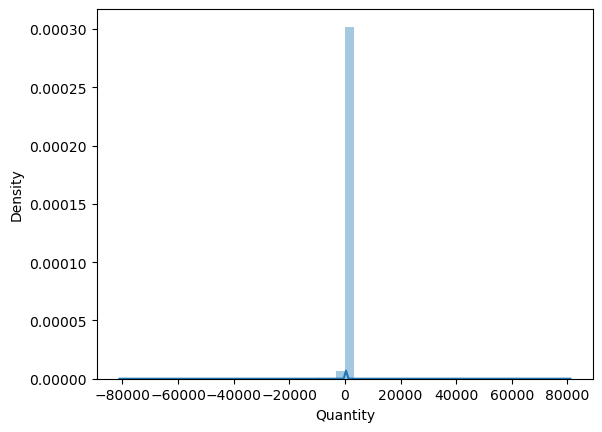

In [17]:
# ▶ distplot 활용 음수 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use(['dark_background'])

sns.distplot(df['Quantity'])

In [18]:
# ▶ UniPrice 음수값 제거
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
# ▶ Quantity 음수값 제거
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
# 541909, 397884
df.shape

(397884, 8)

In [21]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
# ▶ 이용 고객수(4,338명), 이용품목건수(5,167,812건), 이용 나라(37개국),
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4338, 5167812, 37)

In [23]:
# ▶ 인당 평균 구매건수(91건)
df.groupby('CustomerID')['InvoiceNo'].count().mean()

91.72060857538035

## **🔉Process02**  
**┗ 지표 기획 및 데이터 추출**  
---

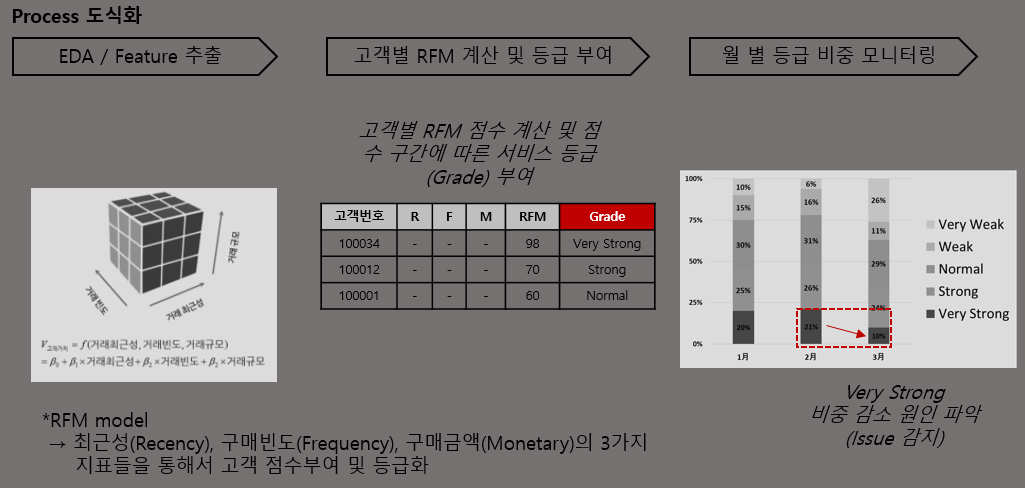

In [25]:
from re import A
from PIL import Image
Image.open('img18.PNG의 사본.png')

### · Recency(최근성)
---

In [27]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
# ▶ split 사용해서 송장 데이터에 날짜 데이터만 추출하기
df['InvoiceDate'].str.split(' ').str[0]

0         12/1/2010
1         12/1/2010
2         12/1/2010
3         12/1/2010
4         12/1/2010
            ...    
541904    12/9/2011
541905    12/9/2011
541906    12/9/2011
541907    12/9/2011
541908    12/9/2011
Name: InvoiceDate, Length: 397884, dtype: object

In [29]:
# ▶ Datatime index
import pandas as pd
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [30]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [31]:
# ▶ 고객ID별 가장 마지막 구매일
recency_df = df.groupby('CustomerID',as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [32]:
# ▶ 고객의 가장 마지막 구매일로 부터 몇일이 지났는지를 계산하기 위함
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (df['Date'].max() - x).days)
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [33]:
recency_df.head(5)

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


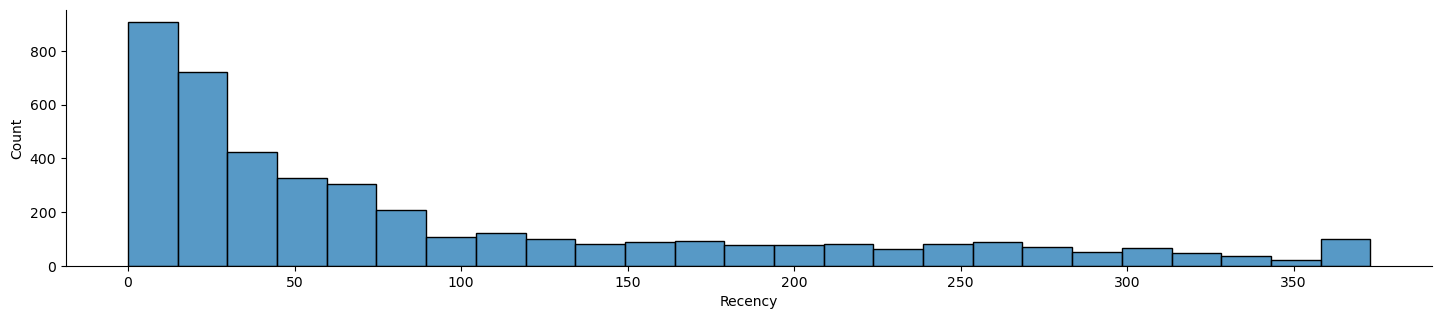

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use(['dark_background'])

sns.displot(data = recency_df, x="Recency");
plt.gcf().set_size_inches(16.5, 3)

### · Frequency(최빈성)
---

In [36]:
# ▶ Customer ID당 유니크한 Invoice를 1개의 주문건으로 인식하여 얼마나 자주 구매하고 있는지를 파악
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


C:\Users\min99\AppData\Local\Temp\ipykernel_52884\2141228087.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(frequency_df['Frequency'], shade=True, color='skyblue')


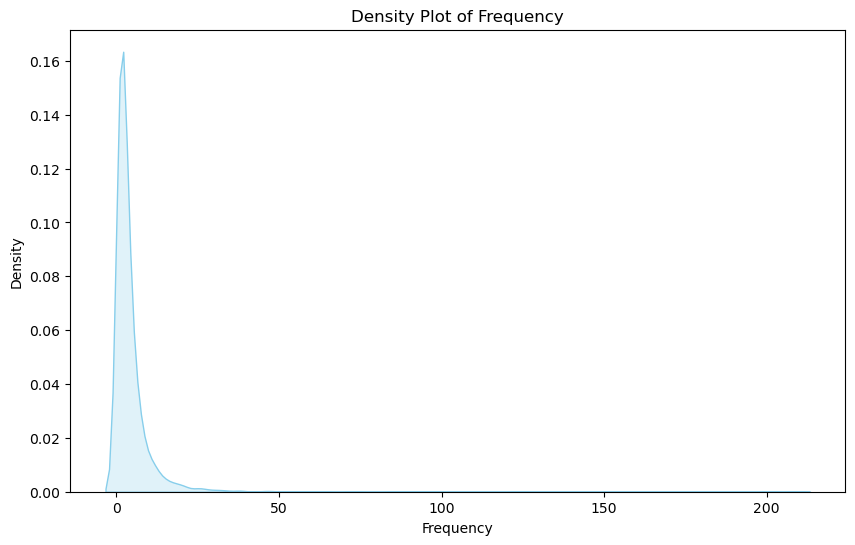

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(frequency_df['Frequency'], shade=True, color='skyblue')
plt.title('Density Plot of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.show()


### · Monetary(금액)
---

In [39]:
# ▶ 구매금액 = 구매개수 * 구매단가
df['Total_cost'] = df['UnitPrice'] * df['Quantity']
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [40]:
# ▶ Data merge

# ▶ recency and frequency
rf = recency_df.merge(frequency_df,how='left',on='CustomerID')

# ▶ monetary

rfm = rf.merge(monetary_df,how='left',on='CustomerID')

rfm.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## **🔊Process03**  
**┗ RFM 활용 서비스 이용 수준 측정**  
---



- 스케일링 적용
- 

### · Scailing Data
---

In [44]:
# ▶ Min max scale = 최대값을 1, 최소값을 0으로 표준화하는 기법
from sklearn.preprocessing import minmax_scale

# ▶ 최근성은 숫자가 작을수록, 즉 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음 그래서 1을 빼주었음.
rfm['Recency'] = minmax_scale(rfm['Recency'], axis=0, copy=True)
rfm['Recency'] = 1-rfm['Recency']

rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis=0, copy=True)

rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis=0, copy=True)

# ▶ Score
rfm['Score']=rfm['Recency']+rfm['Frequency']+rfm['Monetary']

# ▶ Score scaling 100 socre
rfm

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,0.404130
1,12347.0,0.994638,0.028846,0.015368,1.038853
2,12348.0,0.798928,0.014423,0.006401,0.819751
3,12349.0,0.951743,0.000000,0.006259,0.958002
4,12350.0,0.168901,0.000000,0.001180,0.170081
...,...,...,...,...,...
4333,18280.0,0.257373,0.000000,0.000631,0.258004
4334,18281.0,0.517426,0.000000,0.000275,0.517701
4335,18282.0,0.981233,0.004808,0.000622,0.986663
4336,18283.0,0.991957,0.072115,0.007463,1.071535


In [45]:
# ▶ 100점을 곱해서 100점 만점으로 scaling
rfm['Score']=minmax_scale(rfm['Score'], axis=0, copy=True)*100
rfm['Score']=round(rfm['Score'],0)

In [46]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


### · Grade(점수) 구간화
---

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

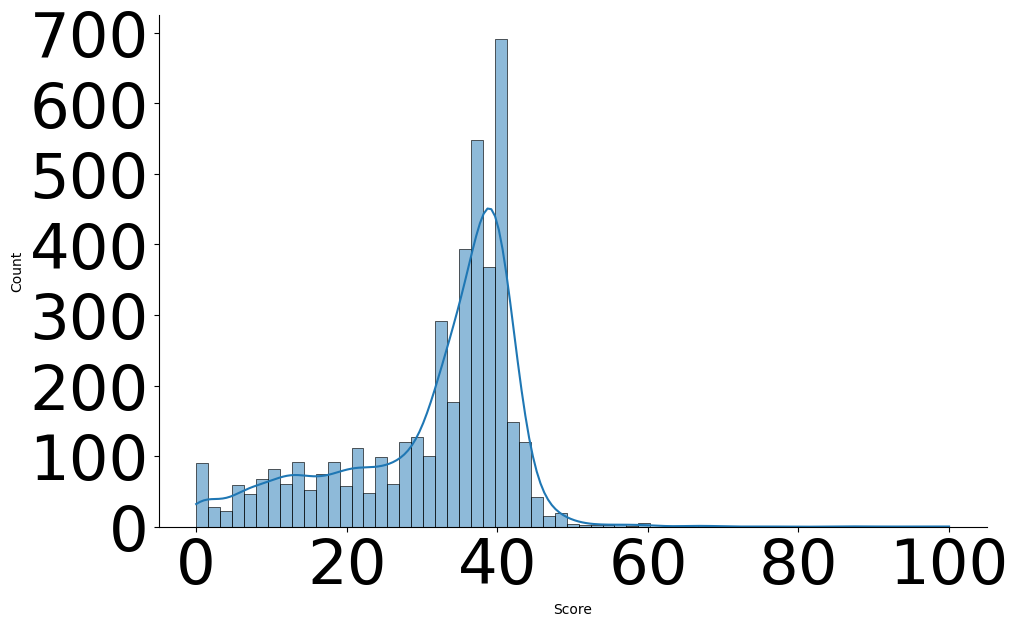

In [48]:
sns.displot(rfm['Score'], kde=True);
plt.gcf().set_size_inches(10, 6)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)

In [49]:
rfm['Score'].value_counts()

Score
40.0     384
39.0     368
38.0     312
41.0     307
37.0     236
35.0     205
36.0     188
34.0     177
33.0     161
42.0     149
32.0     131
31.0     100
43.0      69
29.0      65
30.0      62
28.0      62
26.0      61
12.0      61
20.0      58
27.0      58
22.0      58
24.0      55
21.0      54
15.0      52
44.0      51
14.0      49
1.0       49
23.0      48
17.0      48
18.0      48
7.0       47
19.0      44
25.0      44
13.0      42
11.0      42
0.0       41
10.0      40
8.0       36
9.0       31
6.0       31
5.0       28
2.0       28
16.0      27
45.0      25
4.0       22
46.0      17
47.0      15
48.0      12
49.0       7
50.0       4
57.0       3
60.0       3
67.0       3
53.0       3
51.0       2
55.0       2
59.0       2
56.0       1
58.0       1
52.0       1
95.0       1
100.0      1
86.0       1
54.0       1
65.0       1
76.0       1
70.0       1
89.0       1
Name: count, dtype: int64

In [50]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


In [51]:
# ▶ 점수별로 고객의 등급을 부여
# 60점 이상 Very storong
# 40~60점 Storng
# 20~40점 Normal
# 10~20점 Weak
# 0~10점 Very Weak

rfm['Grade'] = rfm['Score'].apply(lambda x : '01.Very Strong' if x>=60 else
                                  ('02.Strong' if x>=40 else
                                   ('03.Normal' if x>=20 else
                                    ('04.Weak' if x>=10 else '05.Very Weak'))))
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score,Grade
0,12346.0,0.128686,0.000000,0.275443,16.0,04.Weak
1,12347.0,0.994638,0.028846,0.015368,42.0,02.Strong
2,12348.0,0.798928,0.014423,0.006401,33.0,03.Normal
3,12349.0,0.951743,0.000000,0.006259,39.0,03.Normal
4,12350.0,0.168901,0.000000,0.001180,7.0,05.Very Weak


In [52]:
# ▶ 기존 Data에 고객의 등급(Grade) Data를 left join
df = pd.merge(df, rfm, how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak


In [53]:
# ▶ 지표 기획에 앞서, 년월만 새로운 col로 정의 (※ 월별 분석을 하기위한 준비과정)
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12


### · 지표 기획

#### · 월 별 이용 고객 현황
---

In [65]:
df2 = df[df['Date_1'] != '2011-12']

In [66]:
# ▶ 월별 이용 고객 현황(MAU) 
df_cus = df2.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus.tail(5)

,Date_1,CustomerID
7,2011-07,949
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664


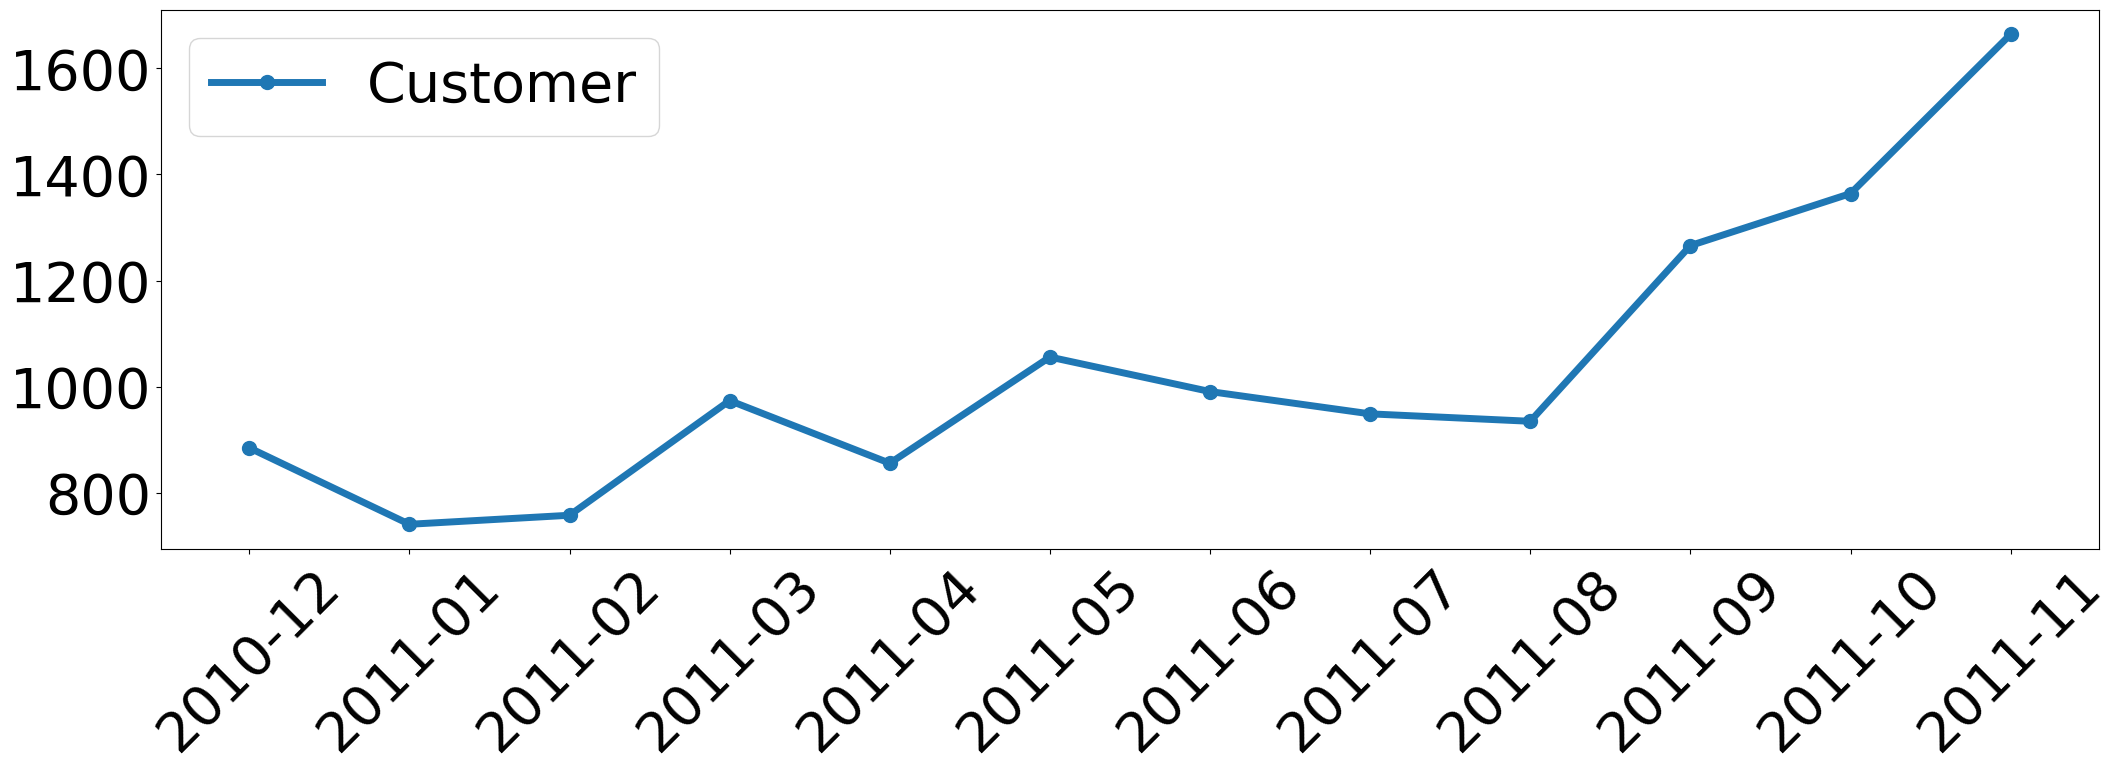

In [67]:
# ▶ 2010.12 런칭이후 사용자 수가 증가하고 2011.11월 Peak를 달성했으나, 곤두박질..
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer', linewidth=5, marker='o',  markersize=10);
plt.legend(fontsize=40);
plt.gcf().set_size_inches(25, 7)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)
plt.savefig("image1.png")

#### · 월 별 이용 건수
---

In [70]:
# ▶ 월별 이용 건수
df_cnt = df2.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,997
3,2011-03,1321
4,2011-04,1149


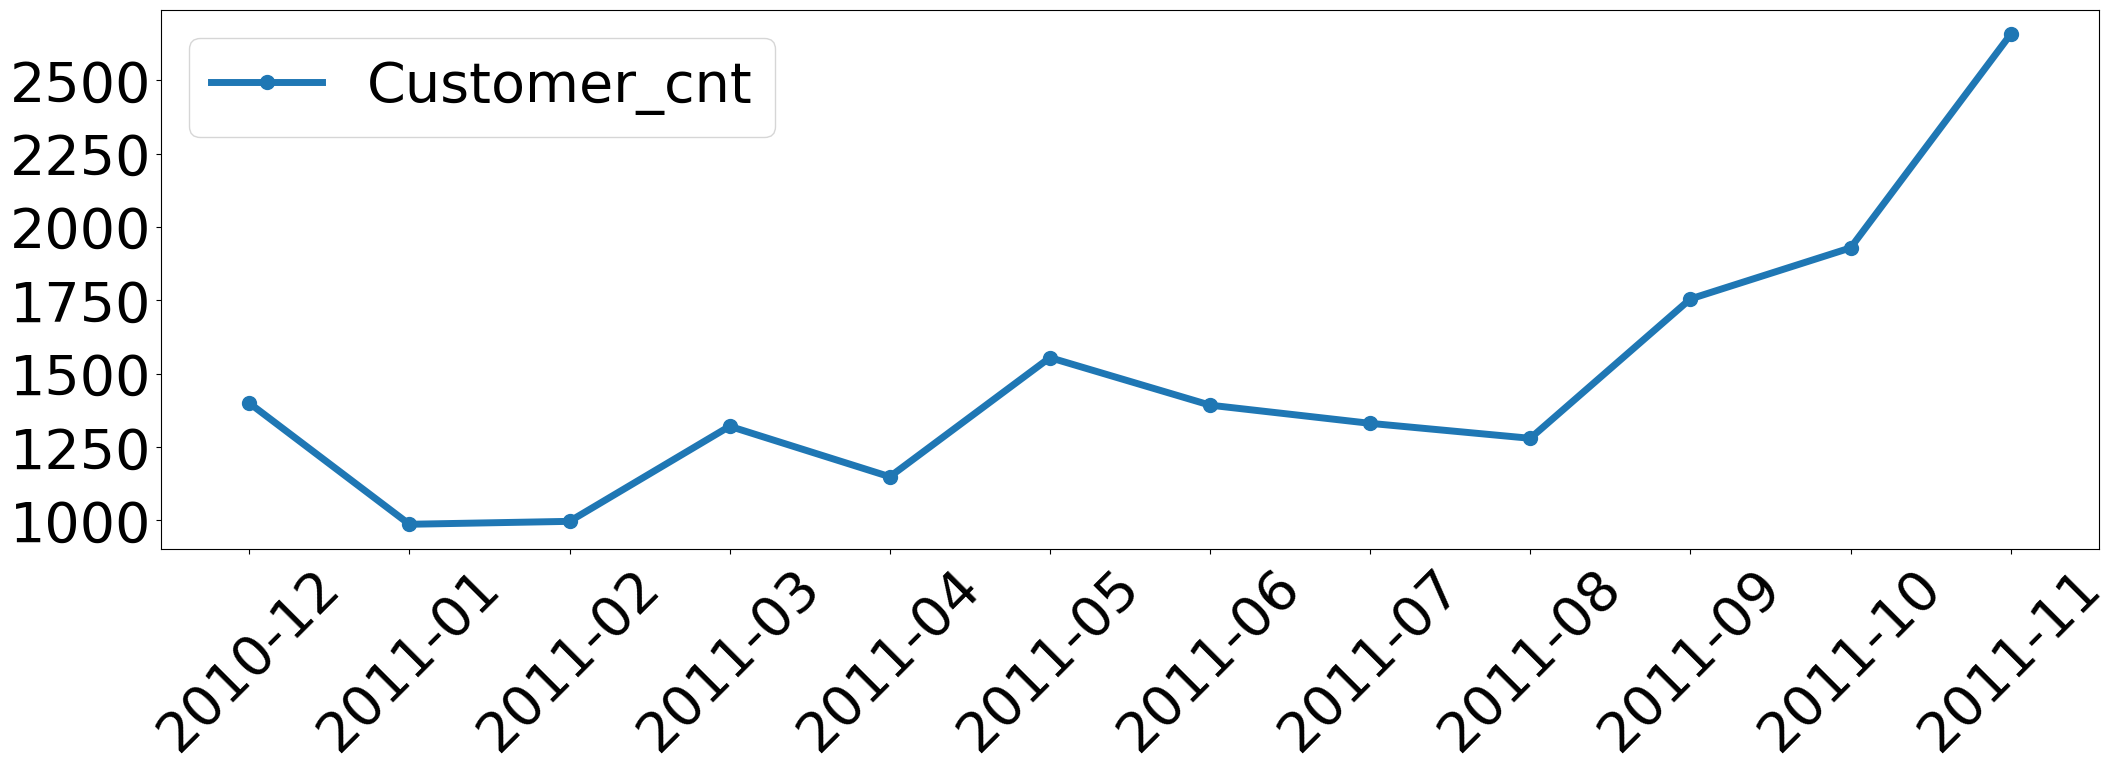

In [71]:
# ▶ 월별 이용 고객수와 비슷한 양상
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt', linewidth=5, marker='o',  markersize=10);
plt.legend(fontsize=40);
plt.gcf().set_size_inches(25, 7)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)
plt.savefig("image1.png")

#### · 월 별 이용 국가
---

In [73]:
df['Country'].nunique()

37

In [74]:
# ▶ 월별 이용 국가
df_country = df2.groupby('Date_1',as_index=False)['Country'].nunique()
df_country

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24
5,2011-05,20
6,2011-06,24
7,2011-07,24
8,2011-08,23
9,2011-09,20


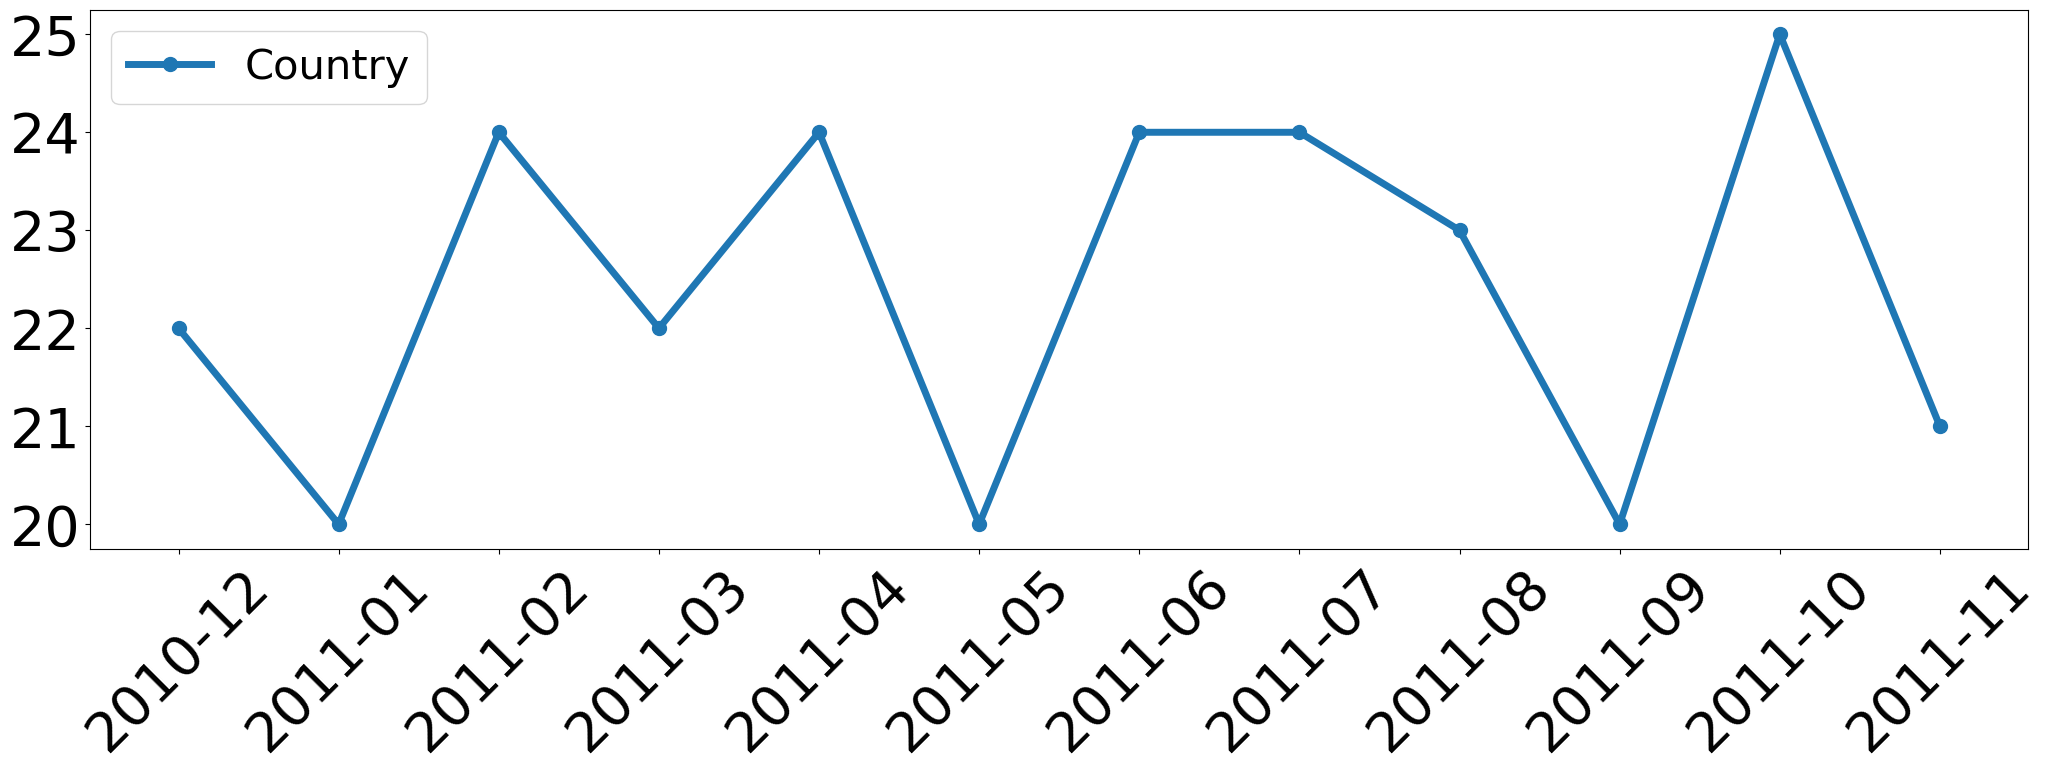

In [78]:
plt.plot(df_country['Date_1'], df_country['Country'], label='Country', linewidth=5, marker='o',  markersize=10);
plt.legend(fontsize=30, loc='upper left')
plt.gcf().set_size_inches(25, 7)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40);

In [79]:
# 가장 충성도가 높은 이용 나라
target = pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False))
target = target.reset_index()

In [80]:
target

,Country,InvoiceNo
0,United Kingdom,16646
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,94
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


C:\Users\min99\AppData\Local\Temp\ipykernel_52884\3270146820.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target.head(10), x='Country', y='InvoiceNo', palette='pastel')


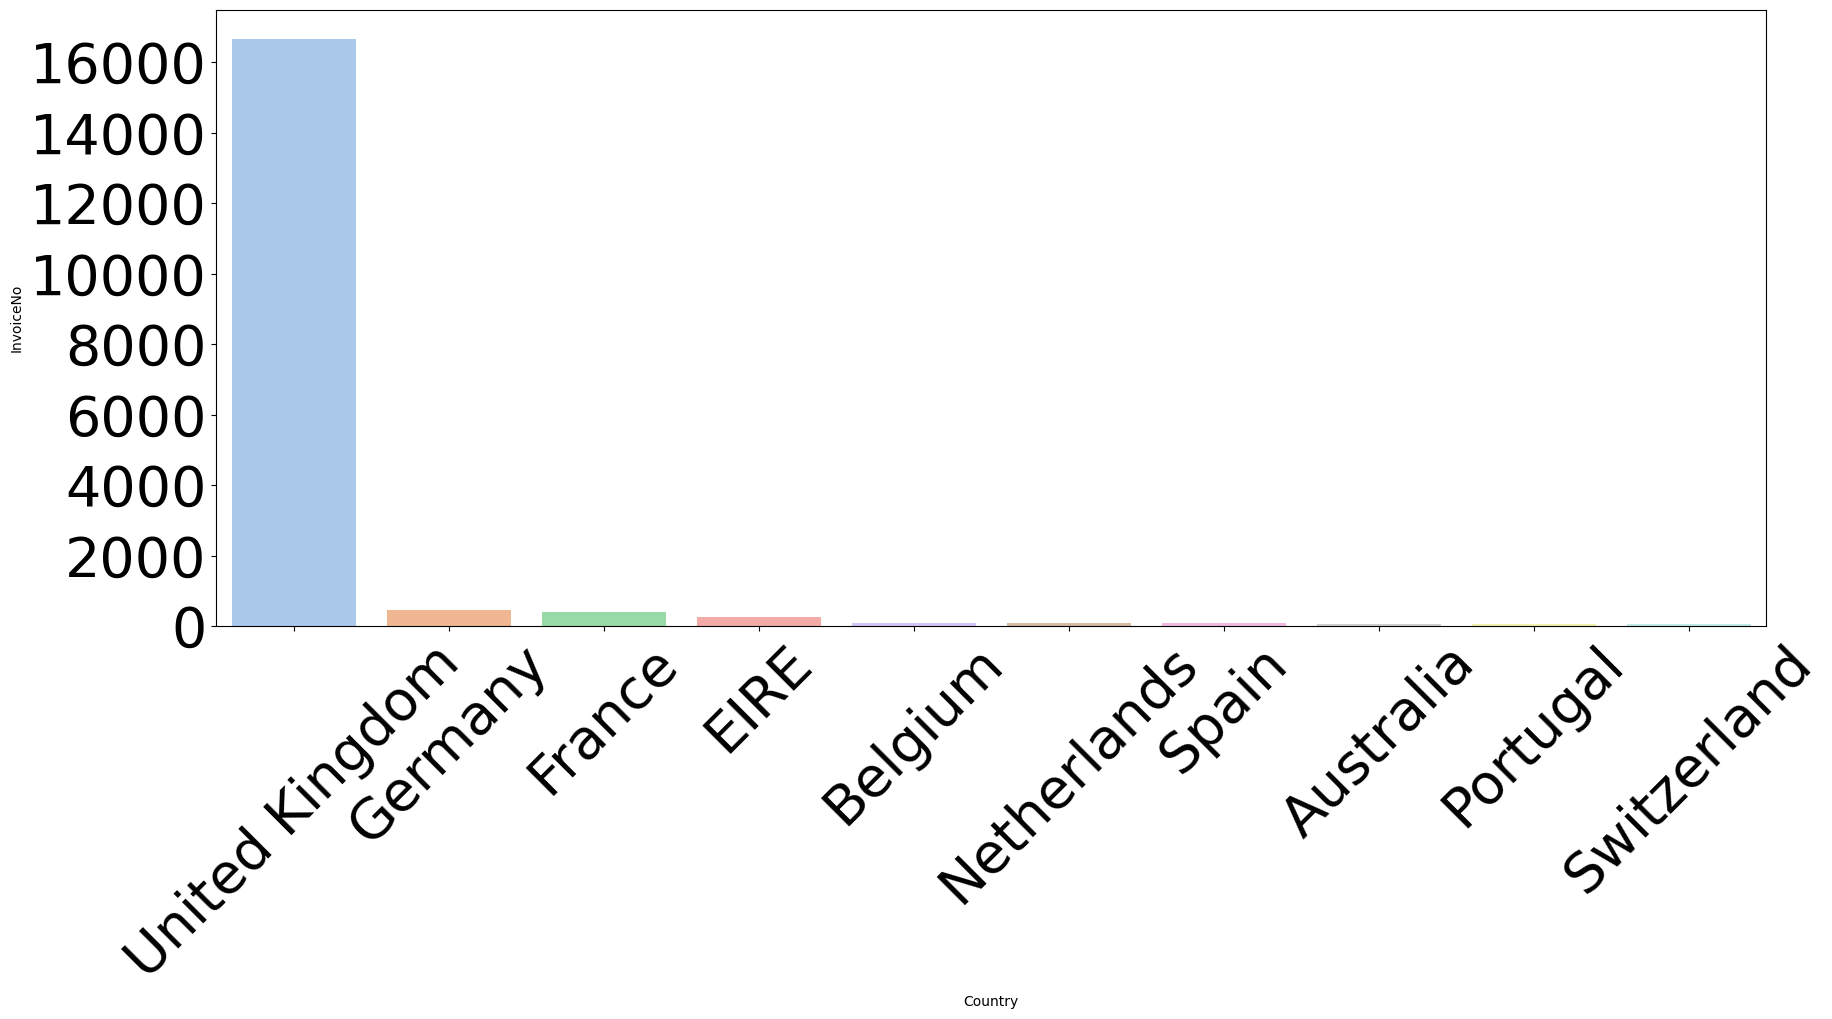

In [81]:
sns.barplot(data=target.head(10), x='Country', y='InvoiceNo', palette='pastel')
plt.gcf().set_size_inches(20, 8)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40);

### · 코호트 분석

In [120]:
import datetime as dt


# ▶ 시간 컬럼을 datetime64형태로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

def get_month(x) : return dt.datetime(x.year,x.month,1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']

# ▶ CustomerID기준으로 가장 최근 구매한 달을 CohortMonth로 설정
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade,Date_1,InvoiceMonth,CohortMonth
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20,1.0,0.014423,0.003066,41.0,02.Strong,2011-12,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60,1.0,0.014423,0.003066,41.0,02.Strong,2011-12,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60,1.0,0.014423,0.003066,41.0,02.Strong,2011-12,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60,1.0,0.014423,0.003066,41.0,02.Strong,2011-12,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,14.85,1.0,0.014423,0.003066,41.0,02.Strong,2011-12,2011-12-01,2011-08-01


In [122]:
# ▶ 날짜에서 year, month, day를 추출하는 사용자 정의함수 생성
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month


# ▶ month_diff + 1을 통해 CohortIndex가 0이 아닌 1부터 시작하게 설정
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [124]:
# ▶ CohortMonth 및 CohortIndex 기준으로 그룹핑 후 nunique 함수를 통해 고유한 고객 숫자 카운팅
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# ▶ pivot table 활용 원하는 형태로 데이터 가공
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# ▶ Retention table, 각 row를 첫 달의 유입 고객수로 나누어 % 계산
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0)
retention = retention.round(3) * 100 #to show the number as percentage
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


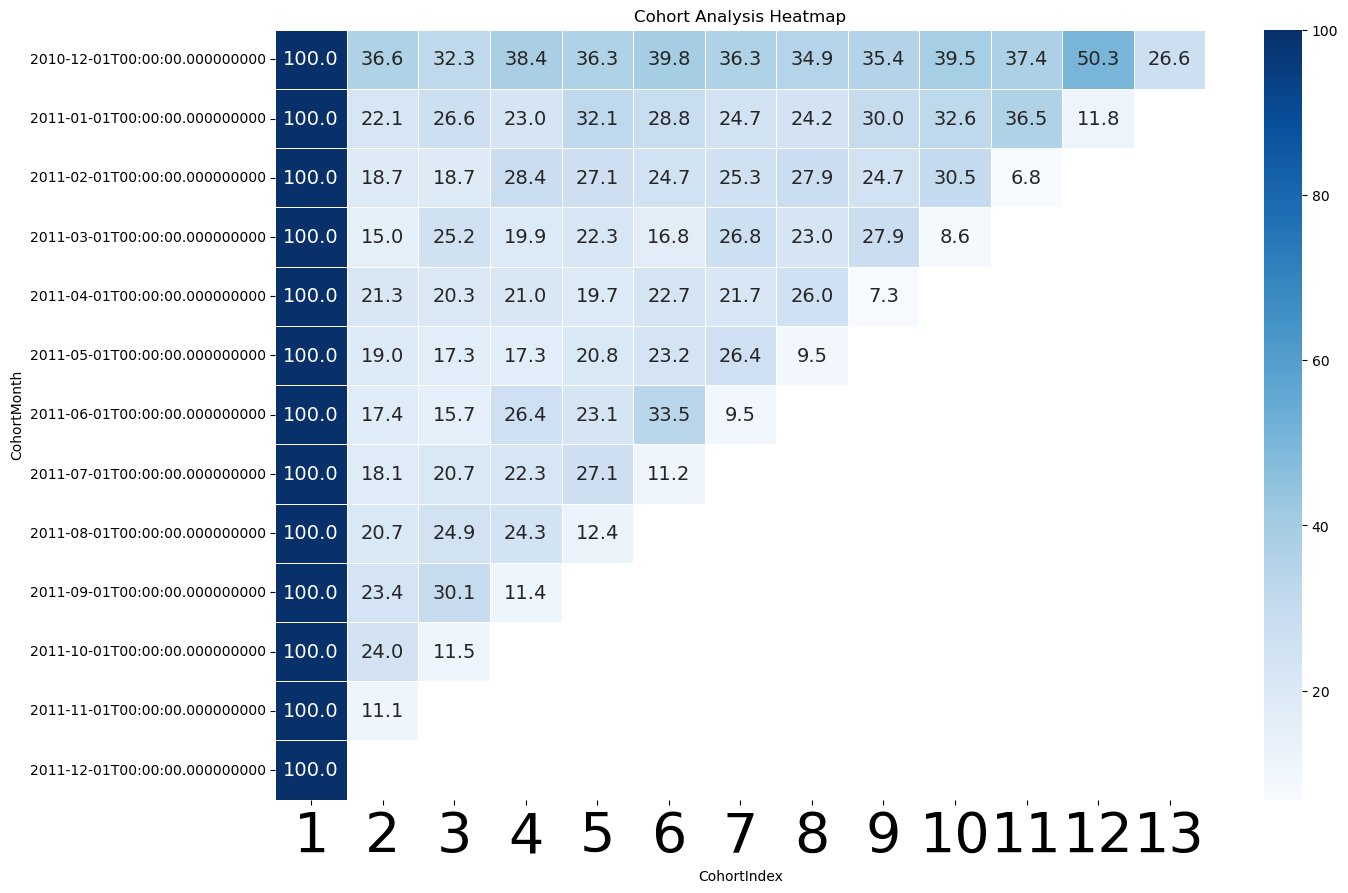

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(retention, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5,  annot_kws={"size": 14})
plt.title("Cohort Analysis Heatmap")
plt.xticks(fontsize=40)

plt.show()

#### · 월 별 Grade 이용 비중
---

In [83]:
df_grade = df2.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade.head(5)

,Date_1,Grade,CustomerID
0,2010-12,01.Very Strong,11
1,2010-12,02.Strong,397
2,2010-12,03.Normal,291
3,2010-12,04.Weak,42
4,2010-12,05.Very Weak,144


In [84]:
df_pivot = pd.pivot_table(df_grade,            # 피벗할 데이터프레임
                      index = 'Date_1',        # 행 위치에 들어갈 열
                      columns = 'Grade',       # 열 위치에 들어갈 열
                      values = 'CustomerID')   # 데이터로 사용할 열

df_pivot.fillna(0, inplace=True)
df_pivot['total'] = df_pivot['01.Very Strong'] + df_pivot['02.Strong'] + df_pivot['03.Normal'] + df_pivot['04.Weak'] + df_pivot['05.Very Weak']


df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.448588,0.328814,0.047458,0.162712
2011-01,0.014845,0.450742,0.349528,0.045884,0.139001
2011-02,0.014512,0.419525,0.377309,0.056728,0.131926
2011-03,0.012320,0.401437,0.388090,0.198152,0.000000
2011-04,0.014019,0.420561,0.394860,0.170561,0.000000
2011-05,0.012311,0.425189,0.428977,0.133523,0.000000
2011-06,0.012109,0.427851,0.560040,0.000000,0.000000
2011-07,0.012645,0.443625,0.543730,0.000000,0.000000
2011-08,0.012834,0.453476,0.533690,0.000000,0.000000


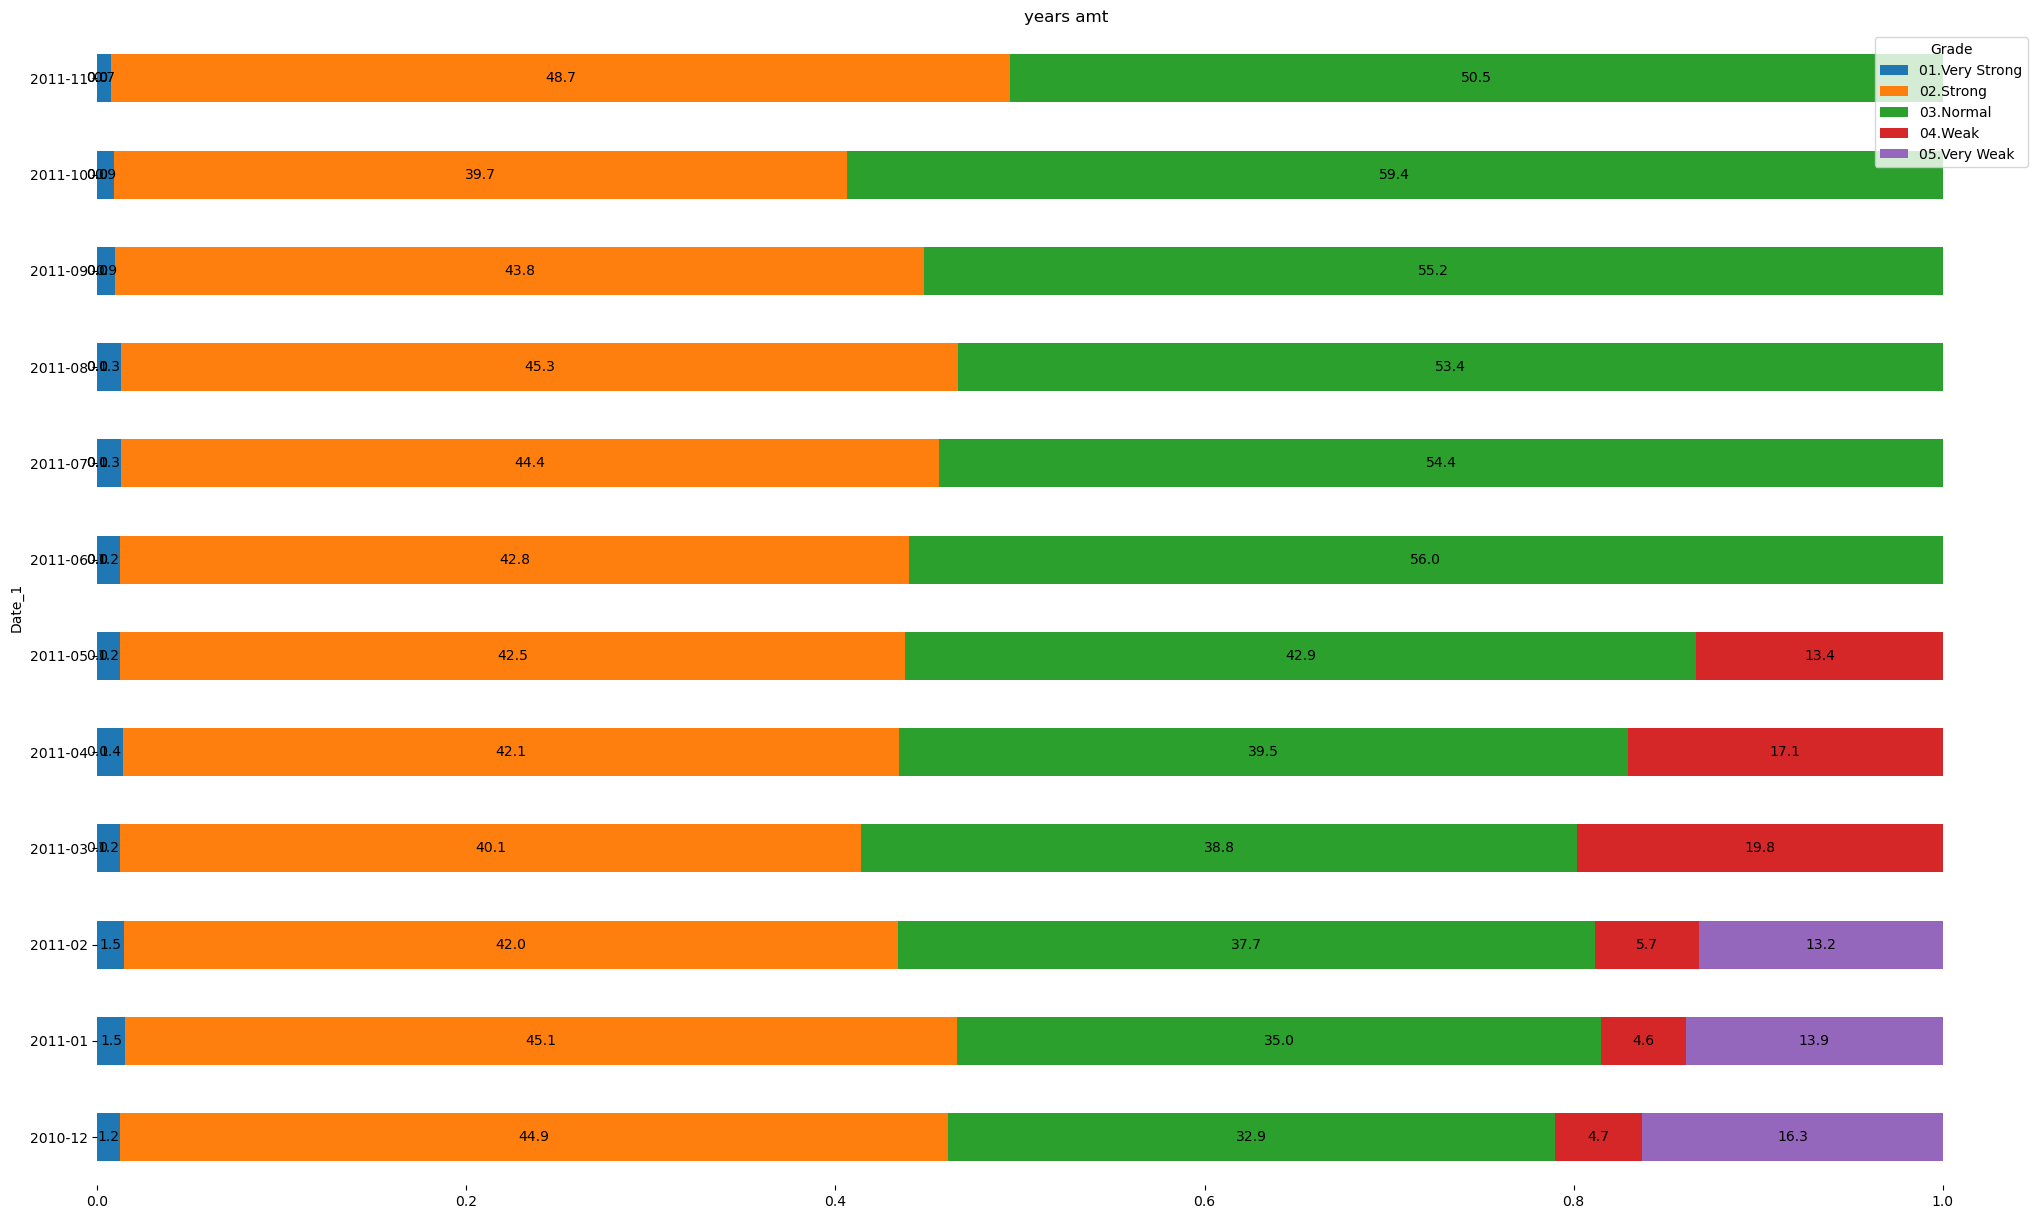

In [85]:
import warnings
warnings.filterwarnings('ignore')
# plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

plt.box(False)
plt.gcf().set_size_inches(25, 15)
plt.show()

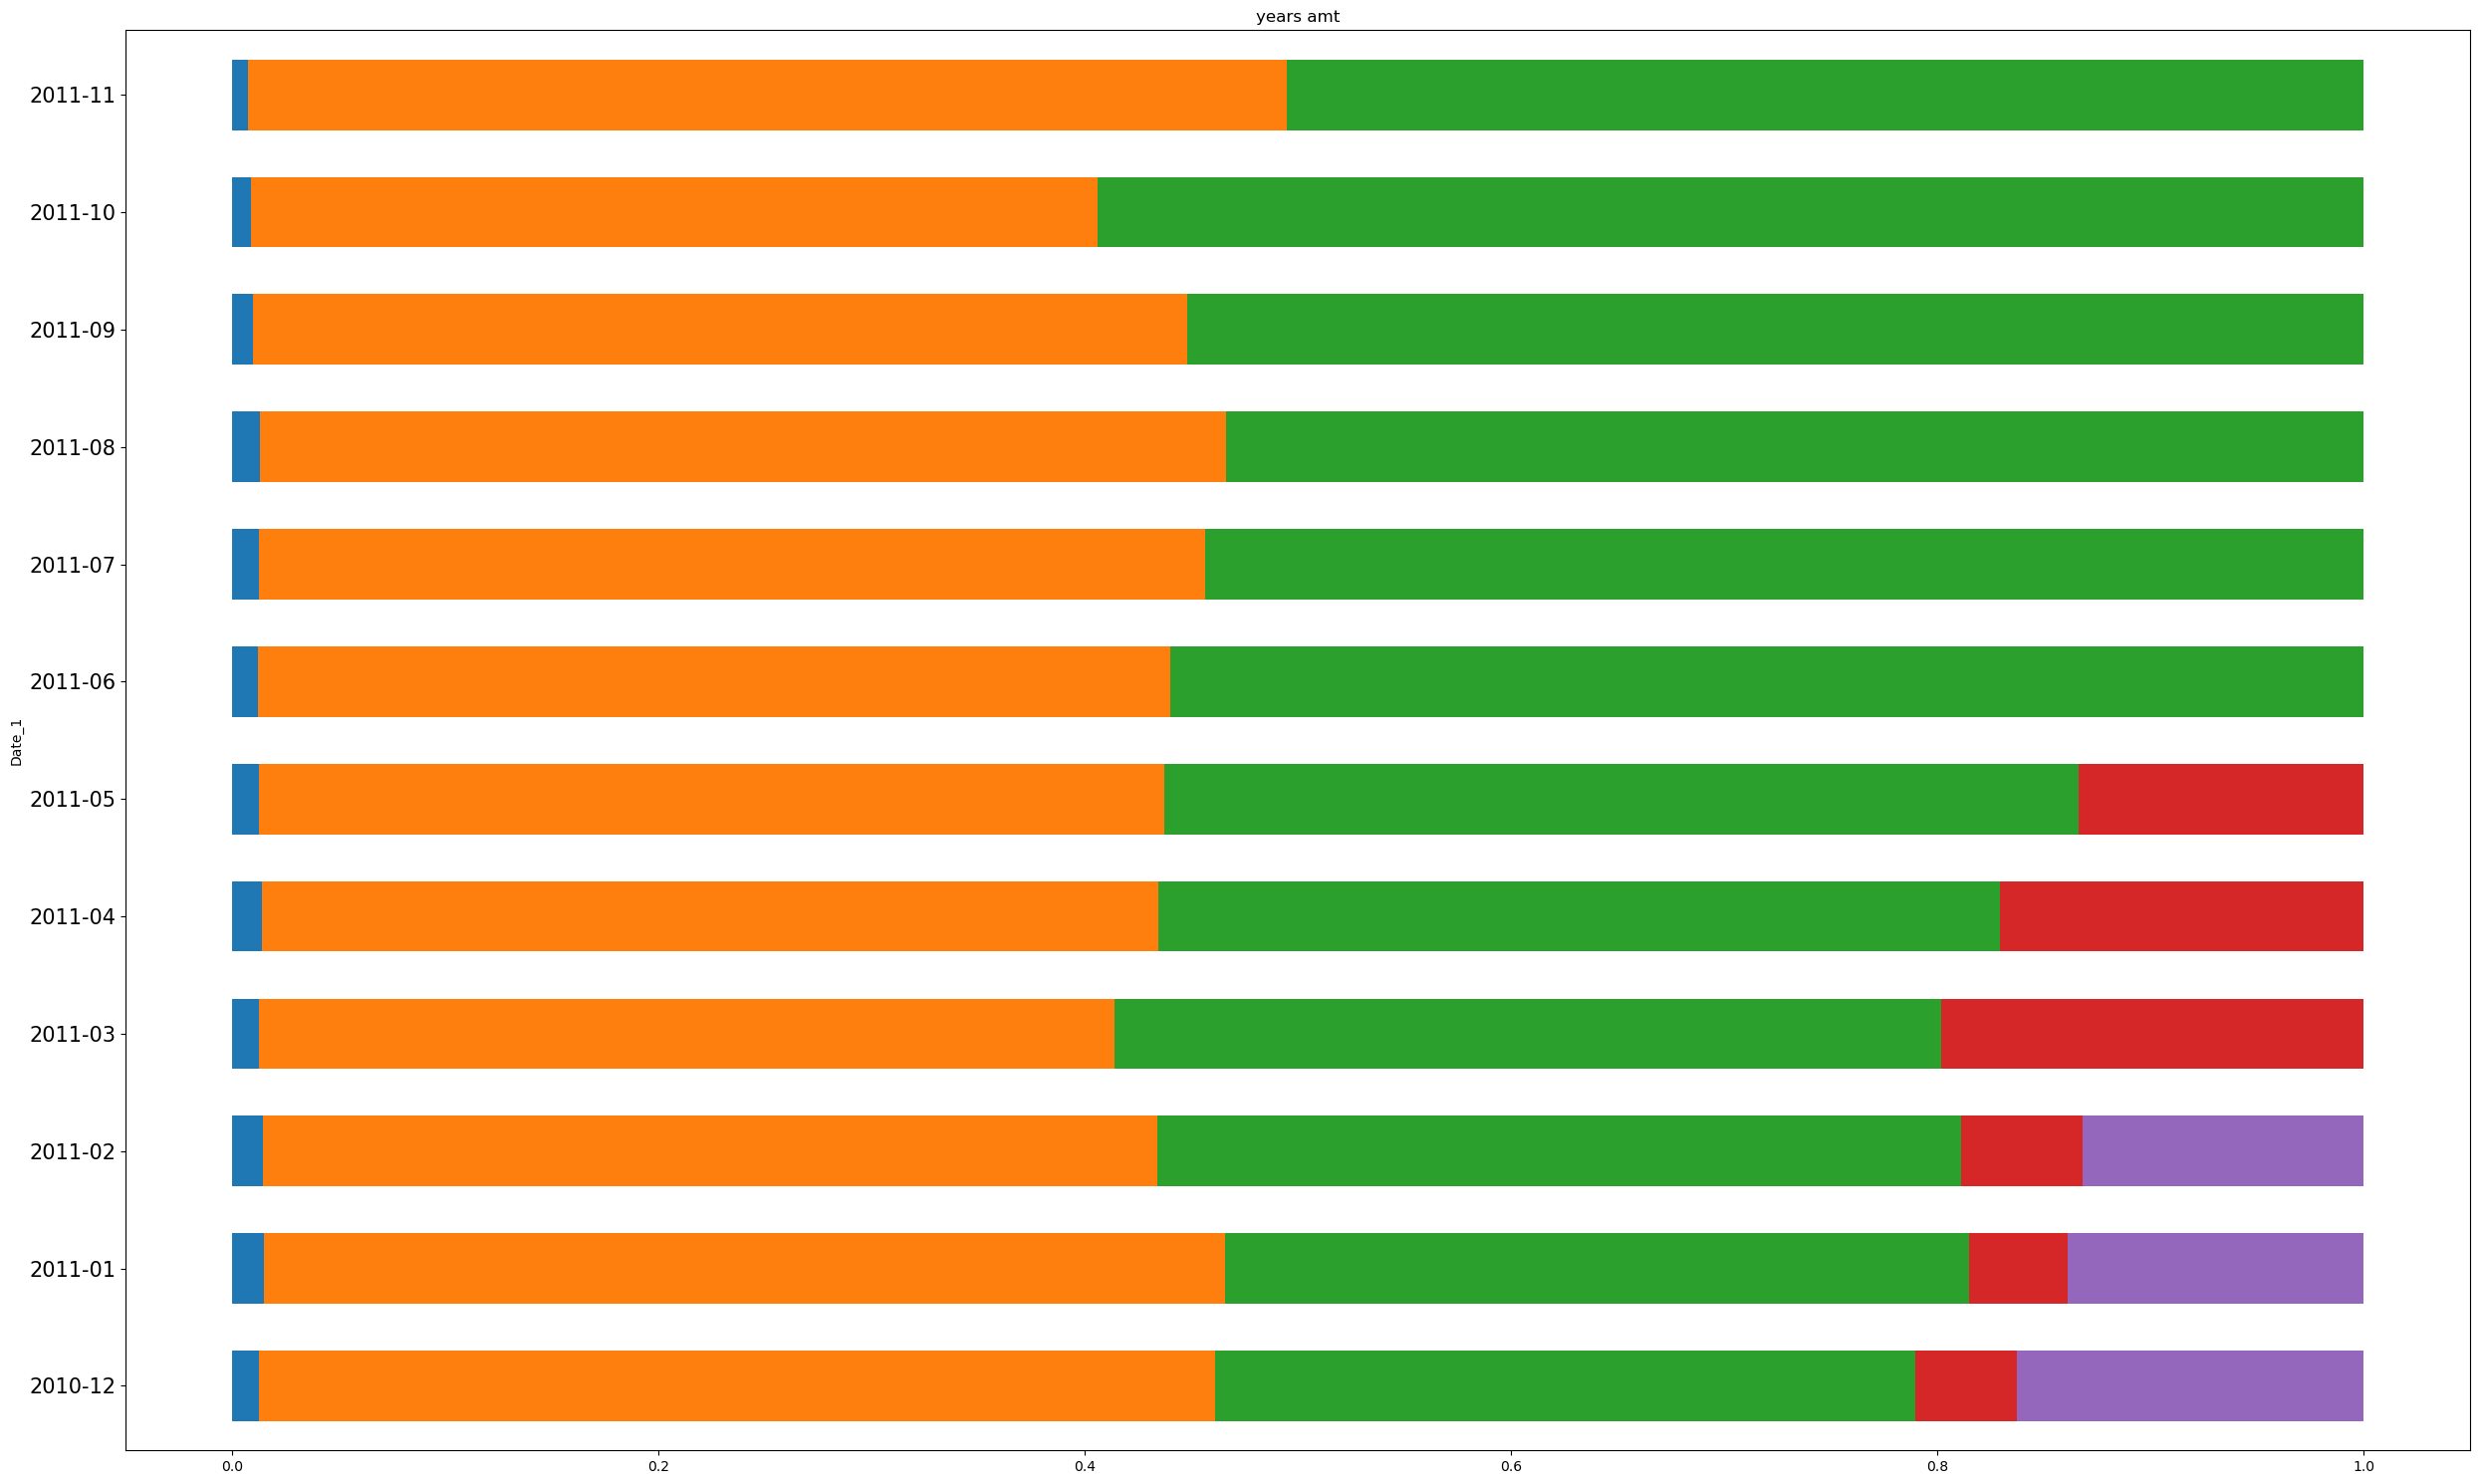

In [86]:
import warnings
warnings.filterwarnings('ignore')

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0, width=0.6)

# 숫자 레이블 추가
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds

# y축 설정 조정
ax.set_yticks(range(len(df_pivot)))
ax.set_yticklabels(df_pivot.index, fontsize=15, ha='right')
ax.set_xlim(left=-0.05)  # x축 왼쪽 여백 추가

# 범례 제거
ax.legend().remove()

plt.gcf().set_size_inches(25, 15)  # 그래프 크기 조정
plt.tight_layout()  # 여백 자동 조정
plt.show()


#### 